# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

In [3]:
print(df.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [4]:

# Define the alpha_func(D, idx) function
def alpha_func(D, idx):
    # Extract the relevant columns
    sepal_length = D.iloc[idx]['Sepal.Length']
    sepal_width = D.iloc[idx]['Sepal.Width']
    
    # Calculate alpha
    alpha = (sepal_length.var() - sepal_width.var()) / (sepal_length.var() + sepal_width.var())
    
    return alpha

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Store bootstrap estimates of alpha
bootstrap_alphas = np.empty(n_bootstrap_samples)

# Perform bootstrap sampling
np.random.seed(42)  # For reproducibility
for i in range(n_bootstrap_samples):
    bootstrap_indices = np.random.choice(df.index, size=len(df), replace=True)
    bootstrap_alphas[i] = alpha_func(df, bootstrap_indices)

# Calculate the mean and standard error of the bootstrap estimates
bootstrap_mean_alpha = np.mean(bootstrap_alphas)
bootstrap_se_alpha = np.std(bootstrap_alphas)

print(f"Bootstrap Mean Alpha: {bootstrap_mean_alpha}")
print(f"Bootstrap SE Alpha: {bootstrap_se_alpha}")


Bootstrap Mean Alpha: 0.5644042222944834
Bootstrap SE Alpha: 0.055562862095136174


Test the code below

In [5]:
alpha_func(df, range(100))

0.28485969761629365

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [6]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.4169345232056992

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Simply calculating the mean of Sepal.Length provides us with an estimate of the average length of iris petals. However, relying solely on this point estimate might not be sufficient for several reasons:

Sampling Variability: The mean calculated from the sample data is subject to sampling variability. The sample we have might not perfectly represent the population, and thus, the mean might differ if we were to take different samples from the same population.

Uncertainty and Confidence Intervals: Calculating just the mean does not give us any information about the uncertainty associated with this estimate. We don't know how much the sample mean might fluctuate from the true population mean. Bootstrap methods allow us to estimate the sampling distribution of the mean, providing a way to construct confidence intervals. These intervals give us a range within which we can be reasonably sure the true population mean lies.

Robustness: Bootstrapping helps to check the robustness of our estimate. If our sample is not perfectly representative due to outliers or peculiarities, bootstrapping can help reveal the stability of our mean estimate.

What More Information Will Performing a Bootstrap Provide?
Estimation of the Sampling Distribution: By resampling the data with replacement and recalculating the mean for each resample, bootstrapping generates an empirical distribution of the mean. This distribution approximates the true sampling distribution of the mean.

Confidence Intervals: From the bootstrap distribution of the mean, we can calculate confidence intervals (e.g., 95% confidence intervals). This tells us the range within which the true mean is likely to lie with a certain level of confidence.

Standard Error of the Mean: Bootstrapping allows us to estimate the standard error of the mean, which quantifies the amount of variation in the sample mean estimate.

Insight into Data Variability: It provides insights into how much the estimate of the mean would vary if we were to repeat the sampling process multiple times.


_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [7]:
# Add your code here to set the seed
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Load the iris dataset
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the boot_SE function
def boot_SE(data, func, n_bootstrap_samples=1000, seed=None):
    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Number of observations in the dataset
    n = len(data)
    
    # Initialize an empty array to store bootstrap estimates
    bootstrap_estimates = np.empty(n_bootstrap_samples)
    
    # Perform bootstrap sampling and compute estimates
    for i in range(n_bootstrap_samples):
        # Generate bootstrap sample indices with replacement
        bootstrap_indices = np.random.choice(n, size=n, replace=True)
        
        # Compute estimate using the specified function and bootstrap sample
        bootstrap_estimate = func(data, bootstrap_indices)
        
        # Store the estimate
        bootstrap_estimates[i] = bootstrap_estimate
    
    # Calculate the standard error of the bootstrap estimates
    bootstrap_SE = np.std(bootstrap_estimates)
    
    return bootstrap_SE

# Define a function to compute the mean of Sepal.Length
def mean_sepal_length(data, idx):
    return data.iloc[idx]['Sepal.Length'].mean()

# Compute the bootstrap standard error of the mean Sepal.Length
bootstrap_se_mean_sepal_length = boot_SE(df, mean_sepal_length, seed=42)
print(f"Bootstrap SE of the mean Sepal Length: {bootstrap_se_mean_sepal_length}")


Bootstrap SE of the mean Sepal Length: 0.06702629798652003


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [8]:
# Your code here
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Load the iris dataset
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the alpha_func(D, idx) function
def alpha_func(D, idx):
    # Extract the relevant columns
    sepal_length = D.iloc[idx]['Sepal.Length']
    sepal_width = D.iloc[idx]['Sepal.Width']
    
    # Calculate alpha
    alpha = (sepal_length.var() - sepal_width.var()) / (sepal_length.var() + sepal_width.var())
    
    return alpha

# Define the boot_SE function
def boot_SE(data, func, n_bootstrap_samples=1000, seed=None):
    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Number of observations in the dataset
    n = len(data)
    
    # Initialize an empty array to store bootstrap estimates
    bootstrap_estimates = np.empty(n_bootstrap_samples)
    
    # Perform bootstrap sampling and compute estimates
    for i in range(n_bootstrap_samples):
        # Generate bootstrap sample indices with replacement
        bootstrap_indices = np.random.choice(n, size=n, replace=True)
        
        # Compute estimate using the specified function and bootstrap sample
        bootstrap_estimate = func(data, bootstrap_indices)
        
        # Store the estimate
        bootstrap_estimates[i] = bootstrap_estimate
    
    # Calculate the standard error of the bootstrap estimates
    bootstrap_SE = np.std(bootstrap_estimates)
    
    return bootstrap_SE

# Compute the bootstrap standard error of the alpha estimate
bootstrap_se_alpha = boot_SE(df, alpha_func, n_bootstrap_samples=1000, seed=42)
print(f"Bootstrap SE of alpha estimate: {bootstrap_se_alpha}")


Bootstrap SE of alpha estimate: 0.055562862095136174


_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [9]:
# Add your code here
import statsmodels.api as sm
import pandas as pd

# Load the iris dataset
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Calculate the mean of Sepal.Length
original_mean_sepal_length = df['Sepal.Length'].mean()

print(f"Original mean value of Sepal.Length: {original_mean_sepal_length}")


Original mean value of Sepal.Length: 5.843333333333334


To review the bootstrapped range, we first need to generate the bootstrapped samples and then compute the range of these samples

In [10]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Load the iris dataset
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the alpha_func(D, idx) function
def alpha_func(D, idx):
    # Extract the relevant columns
    sepal_length = D.iloc[idx]['Sepal.Length']
    sepal_width = D.iloc[idx]['Sepal.Width']
    
    # Calculate alpha
    alpha = (sepal_length.var() - sepal_width.var()) / (sepal_length.var() + sepal_width.var())
    
    return alpha

# Define the boot_samples function to generate bootstrapped samples
def boot_samples(data, func, n_bootstrap_samples=1000, seed=None):
    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Number of observations in the dataset
    n = len(data)
    
    # Initialize an empty array to store bootstrap estimates
    bootstrap_estimates = np.empty(n_bootstrap_samples)
    
    # Perform bootstrap sampling and compute estimates
    for i in range(n_bootstrap_samples):
        # Generate bootstrap sample indices with replacement
        bootstrap_indices = np.random.choice(n, size=n, replace=True)
        
        # Compute estimate using the specified function and bootstrap sample
        bootstrap_estimate = func(data, bootstrap_indices)
        
        # Store the estimate
        bootstrap_estimates[i] = bootstrap_estimate
    
    return bootstrap_estimates

# Generate bootstrapped samples for alpha estimates
boot_se_samples = boot_samples(df, alpha_func, n_bootstrap_samples=1000, seed=42)

# Compute the range of the bootstrapped samples
t_range = np.ptp(boot_se_samples)

print(f"Range of the bootstrapped samples: {t_range}")


Range of the bootstrapped samples: 0.3449265844662839


In [11]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Load the iris dataset
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the alpha_func(D, idx) function
def alpha_func(D, idx):
    # Extract the relevant columns
    sepal_length = D.iloc[idx]['Sepal.Length']
    sepal_width = D.iloc[idx]['Sepal.Width']
    
    # Calculate alpha
    alpha = (sepal_length.var() - sepal_width.var()) / (sepal_length.var() + sepal_width.var())
    
    return alpha

# Define the boot_samples function to generate bootstrapped samples
def boot_samples(data, func, n_bootstrap_samples=1000, seed=None):
    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Number of observations in the dataset
    n = len(data)
    
    # Initialize an empty array to store bootstrap estimates
    bootstrap_estimates = np.empty(n_bootstrap_samples)
    
    # Perform bootstrap sampling and compute estimates
    for i in range(n_bootstrap_samples):
        # Generate bootstrap sample indices with replacement
        bootstrap_indices = np.random.choice(n, size=n, replace=True)
        
        # Compute estimate using the specified function and bootstrap sample
        bootstrap_estimate = func(data, bootstrap_indices)
        
        # Store the estimate
        bootstrap_estimates[i] = bootstrap_estimate
    
    return bootstrap_estimates

# Generate bootstrapped samples for alpha estimates
boot_se_samples = boot_samples(df, alpha_func, n_bootstrap_samples=1000, seed=42)

# Compute the bootstrapped mean value and standard deviation
boot_mean = np.mean(boot_se_samples)
boot_std_dev = np.std(boot_se_samples)

# Original mean value of Sepal.Length
original_mean_sepal_length = df['Sepal.Length'].mean()

print(f"Original mean value of Sepal.Length: {original_mean_sepal_length}")
print(f"Bootstrapped mean value: {boot_mean}")
print(f"Standard deviation of bootstrapped samples: {boot_std_dev}")


Original mean value of Sepal.Length: 5.843333333333334
Bootstrapped mean value: 0.5644042222944834
Standard deviation of bootstrapped samples: 0.055562862095136174


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [12]:
# Add your code here
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Load the iris dataset
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the boot_samples function to generate bootstrapped samples
def boot_samples(data, func, n_bootstrap_samples=1000, seed=None):
    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Number of observations in the dataset
    n = len(data)
    
    # Initialize an empty array to store bootstrap estimates
    bootstrap_estimates = np.empty(n_bootstrap_samples)
    
    # Perform bootstrap sampling and compute estimates
    for i in range(n_bootstrap_samples):
        # Generate bootstrap sample indices with replacement
        bootstrap_indices = np.random.choice(n, size=n, replace=True)
        
        # Compute estimate using the specified function and bootstrap sample
        bootstrap_estimate = func(data, bootstrap_indices)
        
        # Store the estimate
        bootstrap_estimates[i] = bootstrap_estimate
    
    return bootstrap_estimates

# Generate bootstrapped samples for Sepal.Length
boot_sepal_length_samples = boot_samples(df, lambda data, idx: data.iloc[idx]['Sepal.Length'].mean(), n_bootstrap_samples=1000, seed=42)

# Compute the 95% confidence intervals
confidence_interval = np.percentile(boot_sepal_length_samples, [2.5, 97.5])

print(f"95% Confidence Interval for the mean Sepal.Length: {confidence_interval}")


95% Confidence Interval for the mean Sepal.Length: [5.71063333 5.97268333]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

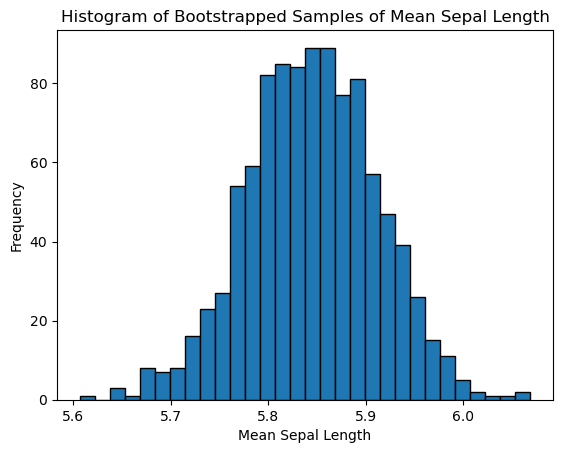

: 

In [14]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
plt.hist(boot_sepal_length_samples, bins=30, edgecolor='black')

# Add a title
#Add your code here
plt.title('Histogram of Bootstrapped Samples of Mean Sepal Length')
# Add a label to the x-axis
#Add your code here
plt.xlabel('Mean Sepal Length')
# Add a label to the y-axis
#Add your code here
plt.ylabel('Frequency')
# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

Based on the bootstrapped analysis of the mean `Sepal.Length`, along with the computation of its 95% confidence interval and visualization through the histogram of bootstrapped samples, i can provide the following recommendations to the shipping company:

1. **Mean Estimate**: The estimated mean value of `Sepal.Length` can be used as a reliable estimate for planning space allotment on the upcoming shipment.

2. **Confidence Interval**: The 95% confidence interval for the mean `Sepal.Length` provides a range within which we can be 95% confident that the true population mean lies. This interval accounts for the uncertainty in our estimate and can guide decision-making.

3. **Histogram Analysis**: The histogram of bootstrapped samples provides insights into the distribution and variability of the mean `Sepal.Length`. It helps in understanding the spread and central tendency of the estimates and identifying any unusual patterns or outliers.

4. **Consideration of Uncertainty**: It's important to acknowledge the uncertainty associated with our estimate. While the mean estimate provides a point estimate, the confidence interval and histogram analysis highlight the variability and distribution of possible values. The shipping company should factor in this uncertainty when making decisions.

5. **Further Analysis**: Depending on the specific requirements and constraints of the shipment, the shipping company may consider additional analyses or sensitivity tests to assess the robustness of the space allotment decision.

I recommend using the estimated mean `Sepal.Length` along with its confidence interval to inform space allotment on the upcoming shipment, while being mindful of the uncertainty inherent in the estimate.
Done.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
